In [1]:
import scenery
import gpt_revised
import pandas as pd

filename = "poems/poems_with_retrained.txt"
sc = scenery.Scenery_Gen()
sc.gpt = gpt_revised.gpt_gen(sonnet_object=sc, model="custom fine_tuning/twice_retrained")
f = open(filename)
lines = [line.strip() for line in f.readlines()]
scores = [float(sc.gpt.score_line(line)) for line in lines]
score_dict = {"lines": lines, "scores": scores}
df = pd.DataFrame.from_dict(score_dict)

loaded fasttext from pickle
loaded glove from pickle
loaded fine_tuning/twice_retrained


In [2]:
sc.gpt = gpt_revised.gpt_gen(sonnet_object=sc)
scores2 = [float(sc.gpt.score_line(line)) for line in lines]
score_dict2 = {"lines": lines, "scores": scores2}
df2 = pd.DataFrame.from_dict(score_dict2)

loaded gpt2


In [3]:
df2

,lines,scores
0,"If you could summon this dark sea of pain,",5.105801
1,the giddy grief will be your wisest life.,4.944522
2,You blowed an all clear line and wistful brain.,6.159831
3,You saw an all gray man and ailing wife.,5.359520
4,The joy was in the flood and the decay,5.092430
...,...,...
219,"within my wont mood, I maintain the truth",6.722083
220,"i say, beseech the wise identity",5.689716
221,and thus paint to the unaccustomed tooth.,5.885252
222,"So small a size of ones, yet I see still;",6.011828


In [4]:
df

,lines,scores
0,"If you could summon this dark sea of pain,",4.347126
1,the giddy grief will be your wisest life.,4.568396
2,You blowed an all clear line and wistful brain.,5.724245
3,You saw an all gray man and ailing wife.,5.378021
4,The joy was in the flood and the decay,4.618481
...,...,...
219,"within my wont mood, I maintain the truth",5.975215
220,"i say, beseech the wise identity",5.247855
221,and thus paint to the unaccustomed tooth.,5.670243
222,"So small a size of ones, yet I see still;",4.949724


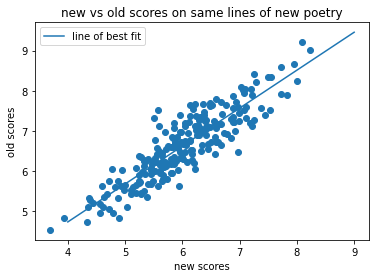

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(df["scores"], df2["scores"])
plt.title("new vs old scores on same lines of new poetry")
plt.xlabel("new scores")
plt.ylabel("old scores")
m, b = np. polyfit(df["scores"], df2["scores"], 1)
plt.plot(range(4, 10), m*np.arange(4, 10) + b, label="line of best fit")
plt.legend()